In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors

df = pd.read_excel(r'Selected Results.xlsx', sheet_name= "analysis")

C:\Users\guaso\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


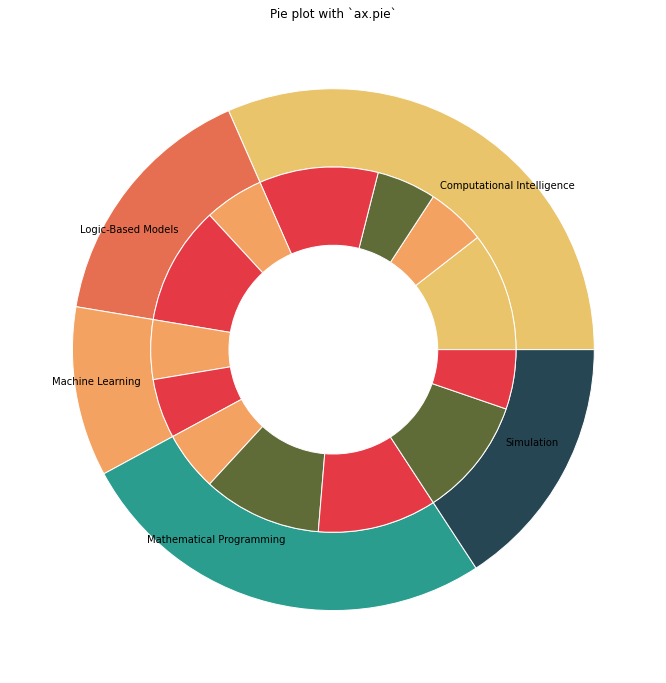

In [2]:
PSA_df = df.loc[(df['Prescriptive Methodology'] != 'None') & (df['Predictive Methodology'] != 'None') &
               (df['Topic'] != 'Location')]

outer = PSA_df.groupby('Prescriptive Methodology')['Year'].agg(['count'])
inner= PSA_df.groupby(['Prescriptive Methodology', 'Predictive Methodology'])['Year'].agg(['count'])

#Set outer colors
outer_colordict = {'Simulation': '#264653','Mathematical Programming': '#2a9d8f', 
                   'Computational Intelligence': '#e9c46a','Machine Learning':'#f4a261',
                   'Logic-Based Models': '#e76f51'}
outer_color = []
for x in outer.index.tolist():
    outer_color.append(outer_colordict[x])
    
#Set inner colors
inner_colordict = {'Probabilistic Model': '#606c38' ,'Statistical Analysis': '#e63946',
             'Machine Learning':'#f4a261','Computational Intelligence':'#e9c46a'}
inner_color = []
for x in inner.index.tolist():
    inner_color.append(inner_colordict[x[1]])


#Pie chart
fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer.values.flatten(), radius=1,
       labeldistance = 0.75,
       labels=outer.index,
       colors = outer_color,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size, 
       labels=None,
       colors = inner_color,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()